# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset.
This lab will ask you to do a deeper data exploration

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_07_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email

PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [58]:
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/superstore_retail_orders.csv?raw=true')
df.describe()

,order_id,quantity,product_price
count,56043.000000,56004.000000,56043.000000
mean,61668.410578,3.348582,6198.309433
std,7508.142486,422.654112,35784.965255
min,45079.000000,1.000000,2.290000
25%,55644.500000,1.000000,7.950000
50%,61870.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to categories if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [59]:
#Convert numbers
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
#Convert catagorical
cata_cols = ['order_type', 'customer_name', 'city', 'state_province', 'email', 'product_name', 'product_line', 'product_status']
for col in cata_cols:
  df[col] = df[col].astype('category')
df.dtypes
#Remove NULL
df_clean = df.dropna().copy()
#Create total_amount
df_clean.loc[:, 'total_amount'] = df_clean['product_price'] * df_clean['quantity']
df_clean.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,total_amount
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,1949.97
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2599.96
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,3249.95
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99


In [60]:
#outlier check and cleanup
q1=df_clean['product_price'].quantile(0.25)
q3=df_clean['product_price'].quantile(0.75)
iqr=q3-q1
up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr
df_clean = df_clean[(df_clean['product_price'] > low_bound) & (df_clean['product_price'] < up_bound)]

order_date = pd.to_datetime(df_clean['order_date'], errors='coerce').dt.year
df_clean = df_clean[(order_date >= 2022) & (order_date <= 2024)]

In [61]:
#impute values
missing_values = df_clean.isnull().sum()
# Impute missing values in 'city' and 'state_province' with the most frequent value
most_frequent_city = df_clean['city'].mode()[0]
df_clean['city'] = df_clean['city'].fillna(most_frequent_city)

most_frequent_state = df_clean['state_province'].mode()[0]
df_clean['state_province'] = df_clean['state_province'].fillna(most_frequent_state)

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [68]:
#create variable
customer_fields = ['customer_name', 'city', 'state_province', 'email']
df_clean["complete_customer_info"] = np.where(df_clean[customer_fields].notna().all(axis=1), 1, 2)

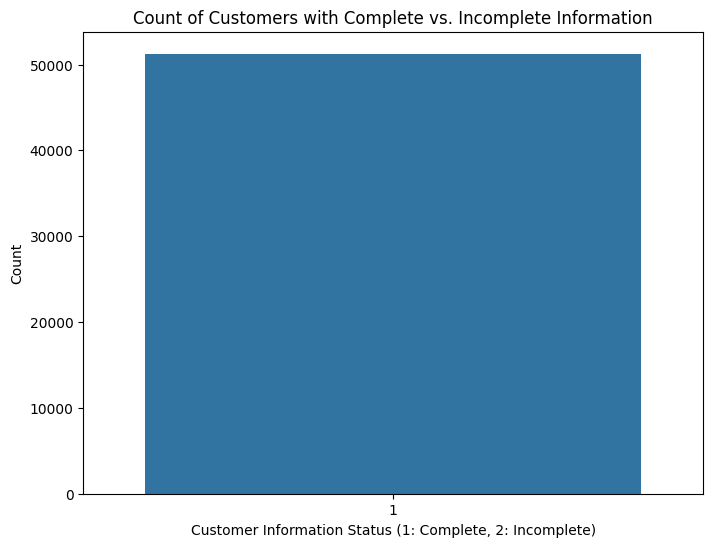

In [70]:
# Calculate counts for complete and incomplete customer information
customer_info_counts = df_clean['complete_customer_info'].value_counts()

# Create the bar plot using the calculated counts
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.barplot(x=customer_info_counts.index, y=customer_info_counts.values)
plt.title('Count of Customers with Complete vs. Incomplete Information')
plt.xlabel('Customer Information Status (1: Complete, 2: Incomplete)')
plt.ylabel('Count')
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Spring, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [75]:
#seasonality
# Assuming 'order_date' is a datetime column
df_clean['season'] = (df_clean['order_date'].dt.month%12 + 3)//3
season_mapping = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}
df_clean['season'] = df_clean['season'].map(season_mapping)

season
Fall       6329498.02
Spring    11033371.47
Summer     6478364.61
Winter     7980707.07
Name: total_amount, dtype: float64


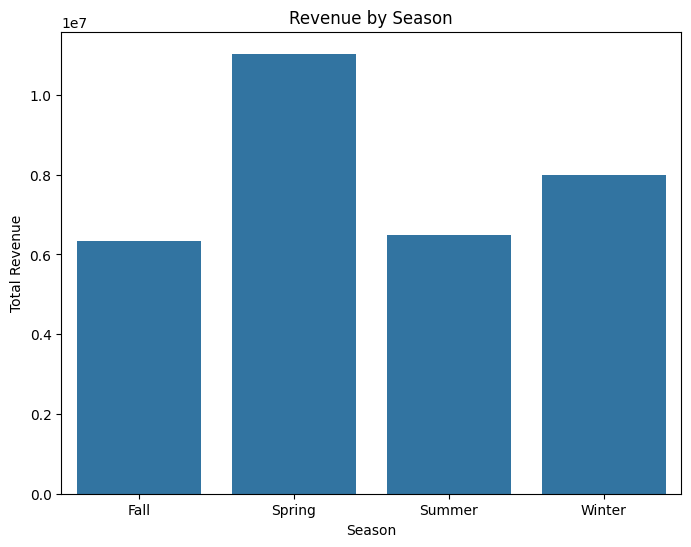

In [78]:
#revenue over time
seasonal_revenue = df_clean.groupby('season')['total_amount'].sum()
print(seasonal_revenue)
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_revenue.index, y=seasonal_revenue.values)
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

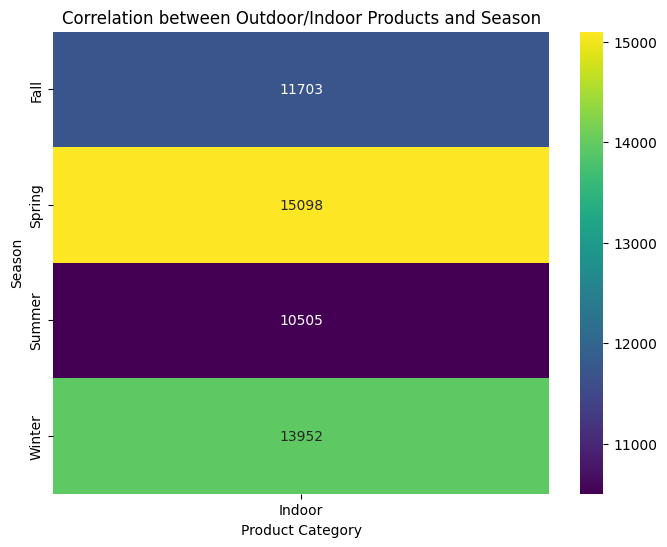

In [81]:
#indoor/outdoor variable
def categorize_product_line(product_line):
  if product_line in ['Camping Equipment', 'Golf Equipment', 'Outdoor Protection', 'Personal Accessories']:
    return 'Outdoor'
  else:
    return 'Indoor'
#correl plot
df_clean['product_category'] = df_clean['product_line'].apply(categorize_product_line)
contingency_table = pd.crosstab(df_clean['season'], df_clean['product_category'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('Correlation between Outdoor/Indoor Products and Season')
plt.xlabel('Product Category')
plt.ylabel('Season')
plt.show()
